In [1]:
from __future__ import print_function, division
import time
import numpy as np
import pandas as pd

## Preprocessing

In [2]:
def read_file(path):
    t0 = time.time()
    df = pd.read_csv(path, na_values=['null', 'Na'])
    print("%.2f secs ==> pd.read_csv"%(time.time()-t0))
    df['os'] = df['useragent'].apply(lambda x: x.split('_')[0])
    df['browser'] = df['useragent'].apply(lambda x: x.split('_')[1])
    return df

In [3]:
df_train = read_file('./data/train.csv')
df_val = read_file('./data/validation.csv')
df_test = read_file('./data/test.csv')

18.92 secs ==> pd.read_csv


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,0.0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN,windows,ie
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,NaN,0,10722,294,23,NaN,2821,NaN,windows,chrome
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,0.0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,1.0,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,NaN,133,7330,277,133,NaN,2259,NaN,windows,ie


## Problem 1

In [8]:
df_train[['click', 'payprice']].groupby(df_train['advertiser']).mean()

,click,payprice
advertiser,,
1458,0.000782,68.992646
2259,0.000322,92.974931
2261,0.000327,89.662184
2821,0.000620,89.077922
2997,0.004355,62.800116
3358,0.000762,84.720599
3386,0.000703,76.766320
3427,0.000675,75.616329
3476,0.000602,76.950083


In [17]:
df_train[['click']].groupby(df_train['os']).mean()

,click
os,
android,0.004848
ios,0.007692
linux,0.002556
mac,0.003087
other,0.000546
windows,0.000572


In [18]:
df_train[['click']].groupby(df_train['browser']).mean()

,click
browser,
chrome,0.000450
firefox,0.000428
ie,0.000646
maxthon,0.000534
opera,0.000000
other,0.002224
safari,0.004163
sogou,0.000000
theworld,0.000357


Text(0,0.5,'CTR')

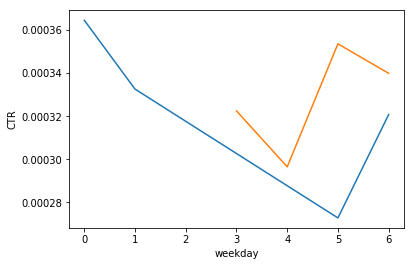

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
df_2259 = df_train[df_train['advertiser']==2259]
df_2261 = df_train[df_train['advertiser']==2261]
df_2259['click'].groupby(df_2259['weekday']).mean().plot()
df_2261['click'].groupby(df_2261['weekday']).mean().plot()
plt.ylabel('CTR')

Text(0,0.5,'CTR')

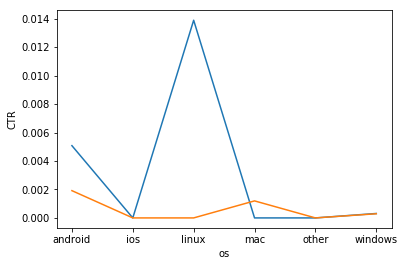

In [38]:
df_2259 = df_train[df_train['advertiser']==2259]
df_2261 = df_train[df_train['advertiser']==2261]
df_2259['click'].groupby(df_2259['os']).mean().plot()
df_2261['click'].groupby(df_2261['os']).mean().plot()
items = list(df_2259['click'].groupby(df_2259['os']).mean().index)
plt.xticks(range(len(items)), items)
plt.ylabel('CTR')

Text(0,0.5,'CTR')

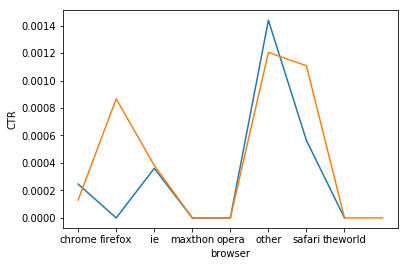

In [43]:
df_2259 = df_train[df_train['advertiser']==2259]
df_2261 = df_train[df_train['advertiser']==2261]
df_2259['click'].groupby(df_2259['browser']).mean().plot()
df_2261['click'].groupby(df_2261['browser']).mean().plot()
items = list(df_2259['click'].groupby(df_2259['browser']).mean().index)
plt.xticks(range(len(items)), items)
plt.ylabel('CTR')

Text(0,0.5,'CTR')

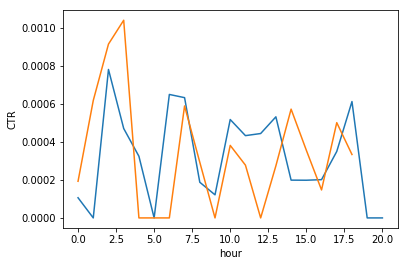

In [40]:
df_2259 = df_train[df_train['advertiser']==2259]
df_2261 = df_train[df_train['advertiser']==2261]
df_2259['click'].groupby(df_2259['hour']).mean().plot()
df_2261['click'].groupby(df_2261['hour']).mean().plot()
plt.ylabel('CTR')

Text(0,0.5,'CTR')

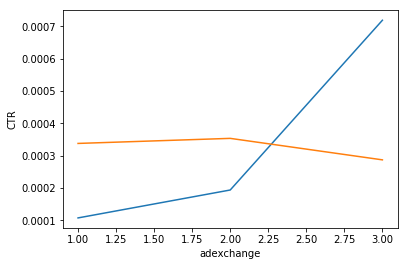

In [41]:
df_2259 = df_train[df_train['advertiser']==2259]
df_2261 = df_train[df_train['advertiser']==2261]
df_2259['click'].groupby(df_2259['adexchange']).mean().plot()
df_2261['click'].groupby(df_2261['adexchange']).mean().plot()
plt.ylabel('CTR')

Text(0,0.5,'price')

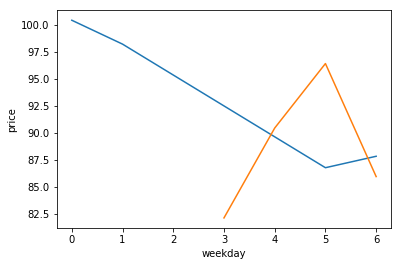

In [44]:
df_2259 = df_train[df_train['advertiser']==2259]
df_2261 = df_train[df_train['advertiser']==2261]
df_2259['payprice'].groupby(df_2259['weekday']).mean().plot()
df_2261['payprice'].groupby(df_2261['weekday']).mean().plot()
plt.ylabel('price')

Text(0,0.5,'price')

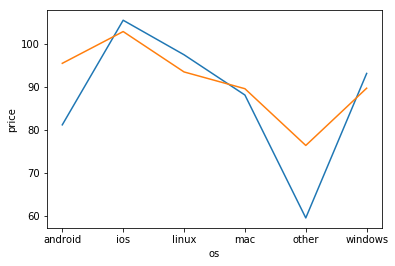

In [47]:
df_2259 = df_train[df_train['advertiser']==2259]
df_2261 = df_train[df_train['advertiser']==2261]
df_2259['payprice'].groupby(df_2259['os']).mean().plot()
df_2261['payprice'].groupby(df_2261['os']).mean().plot()
items = list(df_2259['payprice'].groupby(df_2259['os']).mean().index)
plt.xticks(range(len(items)), items)
plt.ylabel('price')

Text(0,0.5,'price')

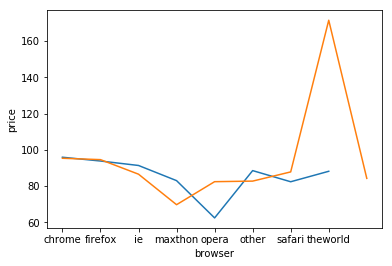

In [49]:
df_2259 = df_train[df_train['advertiser']==2259]
df_2261 = df_train[df_train['advertiser']==2261]
df_2259['payprice'].groupby(df_2259['browser']).mean().plot()
df_2261['payprice'].groupby(df_2261['browser']).mean().plot()
items = list(df_2259['payprice'].groupby(df_2259['browser']).mean().index)
plt.xticks(range(len(items)), items)
plt.ylabel('price')

Text(0,0.5,'price')

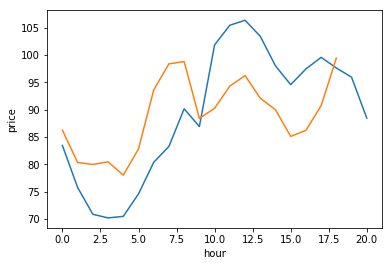

In [50]:
df_2259 = df_train[df_train['advertiser']==2259]
df_2261 = df_train[df_train['advertiser']==2261]
df_2259['payprice'].groupby(df_2259['hour']).mean().plot()
df_2261['payprice'].groupby(df_2261['hour']).mean().plot()
plt.ylabel('price')

Text(0,0.5,'price')

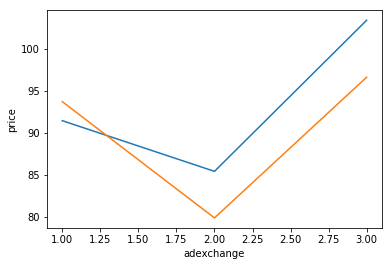

In [51]:
df_2259 = df_train[df_train['advertiser']==2259]
df_2261 = df_train[df_train['advertiser']==2261]
df_2259['payprice'].groupby(df_2259['adexchange']).mean().plot()
df_2261['payprice'].groupby(df_2261['adexchange']).mean().plot()
plt.ylabel('price')